In [8]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
log_dir = 'C:/Users/user/rally_project/data/Rally_style/log/'
to_save_dir = 'C:/Users/user/rally_project/data/Rally_style/CSV_preprocessed/'
waymo_lider = 'training_lidar_10017090168044687777_6380_000_6400_000.parquet'
filename = 'Subida por carretera,BMW M2 Competition,8-4-2023,2 - Subida por carretera,BMW M2 Competition,8-4-2023,2.csv.csv'
df = pd.read_csv(to_save_dir + filename)
print(df.columns.shape)
df.info()

(52,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9891 entries, 0 to 9890
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time(s)          9891 non-null   float64
 1   Lap(s)           9891 non-null   float64
 2   Distance(m)      9891 non-null   float64
 3   Complete%        9891 non-null   float64
 4   X                9891 non-null   float64
 5   Y                9891 non-null   float64
 6   Z                9891 non-null   float64
 7   speed(km/h)      9891 non-null   float64
 8   X vel            9891 non-null   float64
 9   Y vel            9891 non-null   float64
 10  Z vel            9891 non-null   float64
 11  X Rdir           9891 non-null   float64
 12  Y Rdir           9891 non-null   float64
 13  Z Rdir           9891 non-null   float64
 14  X Fdir           9891 non-null   float64
 15  Y Fdir           9891 non-null   float64
 16  Z Fdir           9891 non-null   float64
 17  SP-FL   

In [9]:
ndf = df.copy()
ndf = ndf.drop(ndf[ndf['Lap(s)']<3.68].index,axis = 0)
ndf = ndf.drop(ndf[ndf['Lap(s)']==0].index,axis = 0)
ndf = ndf.reset_index(drop= True)

In [10]:
stage_name = pd.Series(['Subida por carretera']*ndf.shape[0])
stage_surface_types = pd.Series(['Smooth Asphalt']*ndf.shape[0])
stage_location_condition1 = pd.Series(['Day time']*ndf.shape[0])
stage_location_condition2 = pd.Series(['Cloudy']*ndf.shape[0])
stage_location_condition3 = pd.Series(['Wet Surface']*ndf.shape[0])
stage_distance = pd.Series([4.58]*ndf.shape[0])
stage_elevation_change = pd.Series([58.0]*ndf.shape[0])

Vehicle_name = pd.Series(['BMW M2 Competition']*ndf.shape[0])
Vehicle_max_power = pd.Series([400]*ndf.shape[0])
Vehicle_max_weight = pd.Series([1200]*ndf.shape[0])
Vehicle_engine = pd.Series([2979]*ndf.shape[0])
Vehicle_cylinders = pd.Series([6]*ndf.shape[0])
Vehicle_aspiration = pd.Series(['Turbo']*ndf.shape[0])
Vehicle_transmission1 = pd.Series([6]*ndf.shape[0])
Vehicle_transmission2 = pd.Series(['Manual Sequential']*ndf.shape[0])
Vehicle_type = pd.Series(['RWD']*ndf.shape[0])
Vehicle_class = pd.Series(['Rally GT']*ndf.shape[0])
Vehicle_tyre = pd.Series(['Soft']*ndf.shape[0])
Vehicle_tyre_performance = pd.Series([3]*ndf.shape[0])
Vehicle_tyre_durability = pd.Series([1]*ndf.shape[0])

Vehicle_front_toe_angle = pd.Series([0.00]*ndf.shape[0])
Vehicle_front_camber_angle = pd.Series([-1.00]*ndf.shape[0])
Vehicle_rear_toe_angle = pd.Series([0.05]*ndf.shape[0])
Vehicle_rear_camber_angle = pd.Series([-1.50]*ndf.shape[0])
Vehicle_braking_force = pd.Series([3220.00]*ndf.shape[0])
Vehicle_braking_bias = pd.Series([0.74]*ndf.shape[0])
Vehicle_rear_LSD_driving_lock = pd.Series([0.4]*ndf.shape[0])
Vehicle_rear_LSD_braking_lock = pd.Series([0.36]*ndf.shape[0])
Vehicle_rear_LSD_preload = pd.Series([30.00]*ndf.shape[0])
Vehicle_front_LSD_driving_lock = pd.Series([0]*ndf.shape[0])
Vehicle_front_LSD_braking_lock = pd.Series([0]*ndf.shape[0])
Vehicle_front_LSD_preload = pd.Series([0]*ndf.shape[0])

Vehicle_1st_gear = pd.Series([0.311]*ndf.shape[0])
Vehicle_2st_gear = pd.Series([0.411]*ndf.shape[0])
Vehicle_3st_gear = pd.Series([0.531]*ndf.shape[0])
Vehicle_4st_gear = pd.Series([0.671]*ndf.shape[0])
Vehicle_5st_gear = pd.Series([0.828]*ndf.shape[0])
Vehicle_6st_gear = pd.Series([1]*ndf.shape[0])
Vehicle_final_drive = pd.Series([0.253]*ndf.shape[0])

Vehicle_front_slow_bump = pd.Series([0.0]*ndf.shape[0])
Vehicle_front_fast_bump = pd.Series([0.0]*ndf.shape[0])
Vehicle_front_bumpzone_division = pd.Series([0.1]*ndf.shape[0])
Vehicle_front_slow_rebound = pd.Series([0.0]*ndf.shape[0])
Vehicle_rear_slow_bump = pd.Series([0.0]*ndf.shape[0])
Vehicle_rear_fast_bump = pd.Series([0.0]*ndf.shape[0])
Vehicle_rear_bumpzone_division = pd.Series([0.1]*ndf.shape[0])
Vehicle_rear_slow_rebound = pd.Series([0.0]*ndf.shape[0])

Vehicle_front_ride_height = pd.Series([-20.0]*ndf.shape[0])
Vehicle_front_spring_rate = pd.Series([200.75]*ndf.shape[0])
Vehicle_front_anti_rollbar = pd.Series([55.71]*ndf.shape[0])
Vehicle_rear_ride_height = pd.Series([-20.0]*ndf.shape[0])
Vehicle_rear_spring_rate = pd.Series([121.69]*ndf.shape[0])
Vehicle_rear_anti_rollbar = pd.Series([34.29]*ndf.shape[0])

stage_result = pd.Series([-3]*ndf.shape[0])

In [11]:
ndf['stage_name'] = stage_name
ndf['stage_surface_types']  = stage_surface_types
ndf['stage_location_condition1'] = stage_location_condition1
ndf['stage_location_condition2'] = stage_location_condition2
ndf['stage_location_condition3'] = stage_location_condition3
ndf['stage_distance(km)'] = stage_distance
ndf['stage_elevation_change(m)'] = stage_elevation_change

ndf['Vehicle_name'] = Vehicle_name
ndf['Vehicle_max_power(bhp)'] = Vehicle_max_power
ndf['Vehicle_max_weight(kg)'] = Vehicle_max_weight 
ndf['Vehicle_engine(cc)'] = Vehicle_engine
ndf['Vehicle_cylinders'] = Vehicle_cylinders 
ndf['Vehicle_aspiration'] = Vehicle_aspiration
ndf['Vehicle_transmission1'] = Vehicle_transmission1 
ndf['Vehicle_transmission2'] = Vehicle_transmission2
ndf['Vehicle_type'] = Vehicle_type 
ndf['Vehicle_class'] = Vehicle_class
ndf['Vehicle_tyre'] = Vehicle_tyre 
ndf['Vehicle_tyre_performance'] = Vehicle_tyre_performance 
ndf['Vehicle_tyre_durability'] = Vehicle_tyre_durability 

ndf['Vehicle_front_toe_angle(degree)'] = Vehicle_front_toe_angle
ndf['Vehicle_front_camber_angle(degree)'] = Vehicle_front_camber_angle
ndf['Vehicle_rear_toe_angle(degree)'] = Vehicle_rear_toe_angle
ndf['Vehicle_rear_camber_angle(degree)'] = Vehicle_rear_camber_angle
ndf['Vehicle_braking_force(Nm)'] = Vehicle_braking_force
ndf['Vehicle_braking_bias'] = Vehicle_braking_bias
ndf['Vehicle_rear_LSD_driving_lock'] = Vehicle_rear_LSD_driving_lock 
ndf['Vehicle_rear_LSD_braking_lock'] = Vehicle_rear_LSD_braking_lock 
ndf['Vehicle_rear_LSD_preload(Nm)'] = Vehicle_rear_LSD_preload
ndf['Vehicle_front_LSD_driving_lock'] = Vehicle_front_LSD_driving_lock 
ndf['Vehicle_front_LSD_braking_lock'] = Vehicle_front_LSD_braking_lock 
ndf['Vehicle_front_LSD_preload'] = Vehicle_front_LSD_preload 

ndf['Vehicle_1st_gear'] = Vehicle_1st_gear
ndf['Vehicle_2st_gear'] = Vehicle_2st_gear
ndf['Vehicle_3st_gear'] = Vehicle_3st_gear
ndf['Vehicle_4st_gear'] = Vehicle_4st_gear
ndf['Vehicle_5st_gear'] = Vehicle_5st_gear
ndf['Vehicle_6st_gear'] = Vehicle_6st_gear
ndf['Vehicle_final_drive'] = Vehicle_final_drive 
ndf['Vehicle_front_slow_bump'] = Vehicle_front_slow_bump
ndf['Vehicle_front_fast_bump'] = Vehicle_front_fast_bump 
ndf['Vehicle_front_bumpzone_division(mps)'] = Vehicle_front_bumpzone_division 
ndf['Vehicle_front_slow_rebound'] = Vehicle_front_slow_rebound
ndf['Vehicle_rear_slow_bump'] = Vehicle_rear_slow_bump
ndf['Vehicle_rear_fast_bump'] = Vehicle_rear_fast_bump
ndf['Vehicle_rear_bumpzone_division(mps)'] = Vehicle_rear_bumpzone_division
ndf['Vehicle_rear_slow_rebound'] = Vehicle_rear_slow_rebound

ndf['Vehicle_front_ride_height(mm)'] = Vehicle_front_ride_height 
ndf['Vehicle_front_spring_rate(N/mm)'] = Vehicle_front_spring_rate 
ndf['Vehicle_front_anti_rollbar(N/mm)'] = Vehicle_front_anti_rollbar
ndf['Vehicle_rear_ride_height(mm)'] = Vehicle_rear_ride_height 
ndf['Vehicle_rear_spring_rate(N/mm)'] = Vehicle_rear_spring_rate 
ndf['Vehicle_rear_anti_rollbar(N/mm)'] = Vehicle_rear_anti_rollbar 

ndf['stage_result'] = stage_result

In [12]:
ndf = ndf.reset_index(drop= True)
print(ndf.columns)
ndf.to_csv(to_save_dir + 'p_'+filename)

Index(['Time(s)', 'Lap(s)', 'Distance(m)', 'Complete%', 'X', 'Y', 'Z',
       'speed(km/h)', 'X vel', 'Y vel',
       ...
       'Vehicle_rear_fast_bump', 'Vehicle_rear_bumpzone_division(mps)',
       'Vehicle_rear_slow_rebound', 'Vehicle_front_ride_height(mm)',
       'Vehicle_front_spring_rate(N/mm)', 'Vehicle_front_anti_rollbar(N/mm)',
       'Vehicle_rear_ride_height(mm)', 'Vehicle_rear_spring_rate(N/mm)',
       'Vehicle_rear_anti_rollbar(N/mm)', 'stage_result'],
      dtype='object', length=106)


In [18]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
to_save_dir = 'C:/Users/user/rally_project/data/Rally_style/CSV_preprocessed/'
filename1 =  'p_Subida por carretera,BMW M2 Competition,8-4-2023,1 - Subida por carretera,BMW M2 Competition,8-4-2023,1.csv - p_Subida por carretera,BMW M2 Competition,8-4-2023,1 - Subida por carretera,BMW M2 Competition,8-4-2023.csv'
filename2 = 'p_Subida por carretera,BMW M2 Competition,8-4-2023,2 - Subida por carretera,BMW M2 Competition,8-4-2023,2.csv - p_Subida por carretera,BMW M2 Competition,8-4-2023,2 - Subida por carretera,BMW M2 Competition,8-4-2023.csv'
df1 = pd.read_csv(to_save_dir + filename1)
df2 = pd.read_csv(to_save_dir + filename2)

C:\Users\user\AppData\Local\Temp\ipykernel_3128\2752666487.py:8: DtypeWarning: Columns (107,109,110,111,116,119,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(to_save_dir + filename1)
C:\Users\user\AppData\Local\Temp\ipykernel_3128\2752666487.py:9: DtypeWarning: Columns (107,110,116,119,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(to_save_dir + filename2)


2.433236

In [21]:
## 스티어링,엑셀,브레이크,클러치 변화량 컬럼 추가
df1['Delta steering'] = df1['Lap(s)'].copy()
df1['Delta throttle'] = df1['Lap(s)'].copy()
df1['Delta brake'] = df1['Lap(s)'].copy()
df1['Delta clutch'] = df1['Lap(s)'].copy()

df2['Delta steering'] = df2['Lap(s)'].copy()
df2['Delta throttle'] = df2['Lap(s)'].copy()
df2['Delta brake'] = df2['Lap(s)'].copy()
df2['Delta clutch'] = df2['Lap(s)'].copy()
for i in range(df1.shape[0]):
    if i==0:
        df1.loc[i,'Delta steering'] = (df1.iloc[i+1]['Steering'] - df1.iloc[i]['Steering'])/(df1.iloc[i+1]['Lap(s)'] - df1.iloc[i]['Lap(s)'])
        df1.loc[i,'Delta throttle'] = (df1.iloc[i+1]['Throttle'] - df1.iloc[i]['Throttle'])/(df1.iloc[i+1]['Lap(s)'] - df1.iloc[i]['Lap(s)'])
        df1.loc[i,'Delta brake'] = (df1.iloc[i+1]['Brake'] - df1.iloc[i]['Brake'])/(df1.iloc[i+1]['Lap(s)'] - df1.iloc[i]['Lap(s)'])
        df1.loc[i,'Delta clutch'] = (df1.iloc[i+1]['Clutch'] - df1.iloc[i]['Clutch'])/(df1.iloc[i+1]['Lap(s)'] - df1.iloc[i]['Lap(s)'])
        continue
    elif i == df1.shape[0]-1:
        val1 = df1.iloc[i-1]['Delta steering']
        val2 = df1.iloc[i-1]['Delta throttle']
        val3 = df1.iloc[i-1]['Delta brake']
        val4 = df1.iloc[i-1]['Delta clutch'] 
        df1.loc[i,'Delta steering'] = val1
        df1.loc[i,'Delta throttle'] = val2
        df1.loc[i,'Delta brake'] = val3
        df1.loc[i,'Delta clutch'] = val4
        continue
    else:
        df1.loc[i,'Delta steering'] = (df1.iloc[i]['Steering'] - df1.iloc[i-1]['Steering'])/(df1.iloc[i]['Lap(s)'] - df1.iloc[i-1]['Lap(s)'])
        df1.loc[i,'Delta throttle'] = (df1.iloc[i]['Throttle'] - df1.iloc[i-1]['Throttle'])/(df1.iloc[i]['Lap(s)'] - df1.iloc[i-1]['Lap(s)'])
        df1.loc[i,'Delta brake'] = (df1.iloc[i]['Brake'] - df1.iloc[i-1]['Brake'])/(df1.iloc[i]['Lap(s)'] - df1.iloc[i-1]['Lap(s)'])
        df1.loc[i,'Delta clutch'] = (df1.iloc[i]['Clutch'] - df1.iloc[i-1]['Clutch'])/(df1.iloc[i]['Lap(s)'] - df1.iloc[i-1]['Lap(s)'])


for i in range(df2.shape[0]):
    if i==0:
        df2.loc[i,'Delta steering'] = (df2.iloc[i+1]['Steering'] - df2.iloc[i]['Steering'])/(df2.iloc[i+1]['Lap(s)'] - df2.iloc[i]['Lap(s)'])
        df2.loc[i,'Delta throttle'] = (df2.iloc[i+1]['Throttle'] - df2.iloc[i]['Throttle'])/(df2.iloc[i+1]['Lap(s)'] - df2.iloc[i]['Lap(s)'])
        df2.loc[i,'Delta brake'] = (df2.iloc[i+1]['Brake'] - df2.iloc[i]['Brake'])/(df2.iloc[i+1]['Lap(s)'] - df2.iloc[i]['Lap(s)'])
        df2.loc[i,'Delta clutch'] = (df2.iloc[i+1]['Clutch'] - df2.iloc[i]['Clutch'])/(df2.iloc[i+1]['Lap(s)'] - df2.iloc[i]['Lap(s)'])
        continue
    elif i == df2.shape[0]-1:
        val1 = df2.iloc[i-1]['Delta steering']
        val2 = df2.iloc[i-1]['Delta throttle']
        val3 = df2.iloc[i-1]['Delta brake']
        val4 = df2.iloc[i-1]['Delta clutch'] 
        df2.loc[i,'Delta steering'] = val1
        df2.loc[i,'Delta throttle'] = val2
        df2.loc[i,'Delta brake'] = val3
        df2.loc[i,'Delta clutch'] = val4
        continue
    else:
        df2.loc[i,'Delta steering'] = (df2.iloc[i]['Steering'] - df2.iloc[i-1]['Steering'])/(df2.iloc[i]['Lap(s)'] - df2.iloc[i-1]['Lap(s)'])
        df2.loc[i,'Delta throttle'] = (df2.iloc[i]['Throttle'] - df2.iloc[i-1]['Throttle'])/(df2.iloc[i]['Lap(s)'] - df2.iloc[i-1]['Lap(s)'])
        df2.loc[i,'Delta brake'] = (df2.iloc[i]['Brake'] - df2.iloc[i-1]['Brake'])/(df2.iloc[i]['Lap(s)'] - df2.iloc[i-1]['Lap(s)'])
        df2.loc[i,'Delta clutch'] = (df2.iloc[i]['Clutch'] - df2.iloc[i-1]['Clutch'])/(df2.iloc[i]['Lap(s)'] - df2.iloc[i-1]['Lap(s)'])

(array([8985.,   30.,   30.,   30.,   30.,   28.,   30.,   29.,   30.,
         146.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

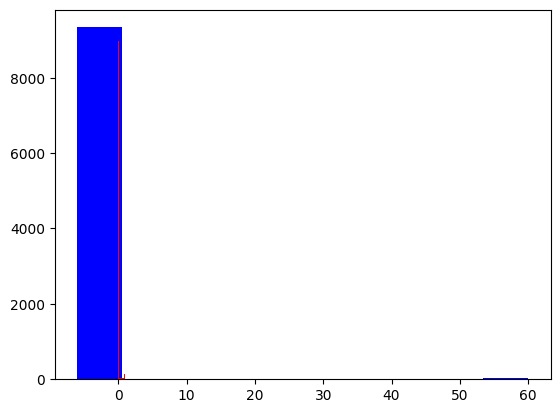

In [28]:
plt.hist(df2['Delta clutch'],color='b')
plt.hist(df2['Clutch'],color='r')


In [29]:
new1_df1 = pd.concat([df1,df2])

drop_col = ['stage_name','stage_surface_types','stage_location_condition1','stage_distance(km)',
            'stage_elevation_change(m)','Vehicle_name','Vehicle_max_power(bhp)','Vehicle_max_weight(kg)',
            'Vehicle_engine(cc)','Vehicle_cylinders','Vehicle_aspiration','Vehicle_transmission1',
            'Vehicle_transmission2','Vehicle_type','Vehicle_class','Vehicle_front_toe_angle(degree)',
            'Vehicle_front_camber_angle(degree)','Vehicle_rear_toe_angle(degree)','Vehicle_rear_camber_angle(degree)',
            'Vehicle_braking_force(Nm)','Vehicle_braking_bias','Vehicle_rear_LSD_driving_lock','Vehicle_rear_LSD_braking_lock',
            'Vehicle_rear_LSD_preload(Nm)','Vehicle_front_LSD_driving_lock','Vehicle_front_LSD_braking_lock',
            'Vehicle_front_LSD_preload','Vehicle_1st_gear','Vehicle_2st_gear','Vehicle_3st_gear','Vehicle_4st_gear',
            'Vehicle_5st_gear','Vehicle_6st_gear','Vehicle_final_drive','Vehicle_front_slow_bump','Vehicle_front_fast_bump',
            'Vehicle_front_bumpzone_division(mps)','Vehicle_front_slow_rebound','Vehicle_rear_slow_bump','Vehicle_rear_fast_bump',
            'Vehicle_rear_bumpzone_division(mps)','Vehicle_rear_slow_rebound','Vehicle_front_ride_height(mm)','Vehicle_front_spring_rate(N/mm)',
            'Vehicle_front_anti_rollbar(N/mm)','Vehicle_rear_ride_height(mm)','Vehicle_rear_spring_rate(N/mm)','Vehicle_rear_anti_rollbar(N/mm)',
            'LapNum'
            ]
new2_df1 = new1_df1.drop('Unnamed: 0',axis = 1)
new2_df1 = new2_df1.drop(drop_col,axis = 1)
new2_df1 = new2_df1.fillna('null')
new2_df1.isnull().sum().sum()



0

In [30]:
new3_df1 = new2_df1.copy()
new3_df1.to_csv(to_save_dir+'project2_data.csv')